<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
# students get this 
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)
# students get this 


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [16]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [17]:
# Calculate accuracy on the test set
test_accuracy = logreg_cv.score(X_test, Y_test)

print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.8333333333333334


Lets look at the confusion matrix:


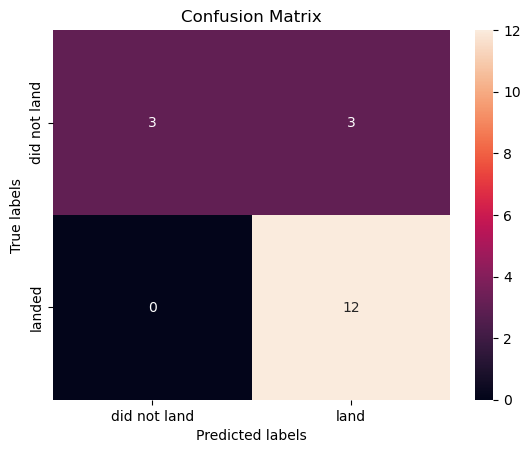

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [21]:
# Create SVM object
svm = SVC(random_state=2)

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')

# Fit to training data
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=2),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [22]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [23]:
# Calculate the accuracy on the test data using the method score

print("=== TASK 7 - SVM TEST ACCURACY ===")

# Calculate accuracy on the test data using the score method
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"SVM Test set accuracy: {svm_test_accuracy:.4f}")
print(f"SVM Test set accuracy (percentage): {svm_test_accuracy * 100:.2f}%")

# Compare with cross-validation accuracy
svm_cv_accuracy = svm_cv.best_score_
print(f"\nComparison:")
print(f"Cross-validation accuracy: {svm_cv_accuracy:.4f}")
print(f"Test set accuracy: {svm_test_accuracy:.4f}")
print(f"Difference: {abs(svm_cv_accuracy - svm_test_accuracy):.4f}")

# Check for overfitting/underfitting
difference = svm_cv_accuracy - svm_test_accuracy
if difference > 0.05:
    print("⚠️  Potential overfitting (CV accuracy significantly higher than test accuracy)")
elif difference < -0.05:
    print("⚠️  Potential underfitting (Test accuracy significantly higher than CV accuracy)")
else:
    print("✅ Good generalization (CV and test accuracies are similar)")

=== TASK 7 - SVM TEST ACCURACY ===
SVM Test set accuracy: 0.8333
SVM Test set accuracy (percentage): 83.33%

Comparison:
Cross-validation accuracy: 0.8482
Test set accuracy: 0.8333
Difference: 0.0149
✅ Good generalization (CV and test accuracies are similar)


We can plot the confusion matrix


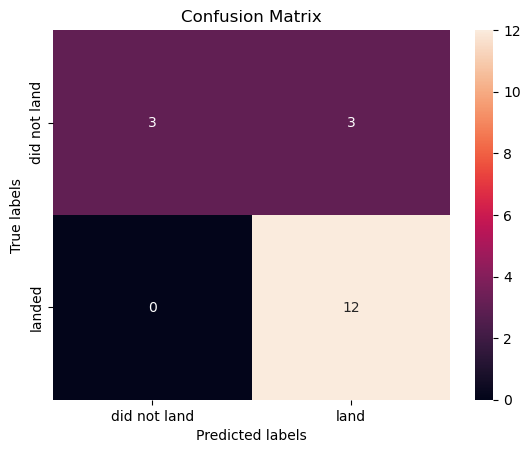

In [24]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [25]:
# Extended analysis for Task 7
print("\n" + "="*50)
print("EXTENDED SVM PERFORMANCE ANALYSIS")
print("="*50)

# Make predictions on test set
y_pred_svm = svm_cv.predict(X_test)

# Calculate multiple metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(Y_test, y_pred_svm)
precision = precision_score(Y_test, y_pred_svm)
recall = recall_score(Y_test, y_pred_svm)
f1 = f1_score(Y_test, y_pred_svm)

print(f"\nDetailed Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(Y_test, y_pred_svm, target_names=['Did Not Land', 'Landed']))


EXTENDED SVM PERFORMANCE ANALYSIS

Detailed Metrics:
Accuracy:  0.8333
Precision: 0.8000
Recall:    1.0000
F1-Score:  0.8889

Classification Report:
              precision    recall  f1-score   support

Did Not Land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [35]:
# Create the Decision Tree object
tree = DecisionTreeClassifier(random_state=2)

# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(
    tree, 
    parameters_tree, 
    cv=10, 
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
print("Fitting Decision Tree with GridSearchCV...")
tree_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("\n BEST DECISION TREE PARAMETERS:")
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(tree_cv.best_score_))



Fitting Decision Tree with GridSearchCV...

 BEST DECISION TREE PARAMETERS:
Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation accuracy: 0.8768


In [36]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8767857142857143


In [38]:
# Detailed classification report
from sklearn.metrics import classification_report, confusion_matrix

# Extended analysis for Decision Tree
print("\n" + "="*60)
print("DETAILED DECISION TREE ANALYSIS")
print("="*60)

# Get the best estimator
best_tree = tree_cv.best_estimator_
print(f"Best tree depth: {best_tree.get_depth()}")
print(f"Number of features: {best_tree.n_features_in_}")
print(f"Number of classes: {best_tree.n_classes_}")

# Calculate accuracy on test set
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"\n📊 PERFORMANCE METRICS:")
print(f"Cross-validation accuracy: {tree_cv.best_score_:.4f}")
print(f"Test set accuracy: {tree_test_accuracy:.4f}")
print(f"Difference: {abs(tree_cv.best_score_ - tree_test_accuracy):.4f}")

# Check for overfitting
difference = tree_cv.best_score_ - tree_test_accuracy
if difference > 0.05:
    print("⚠️  Potential overfitting (CV accuracy > test accuracy by > 0.05)")
elif difference < -0.05:
    print("⚠️  Potential underfitting (Test accuracy > CV accuracy by > 0.05)")
else:
    print("✅ Good generalization (CV and test accuracies are similar)")

# Make predictions on test set
y_pred_tree = tree_cv.predict(X_test)

# Calculate multiple metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(Y_test, y_pred_tree)
precision = precision_score(Y_test, y_pred_tree)
recall = recall_score(Y_test, y_pred_tree)
f1 = f1_score(Y_test, y_pred_tree)

print(f"\n📈 DETAILED METRICS:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report
print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(Y_test, y_pred_tree, target_names=['Did Not Land', 'Landed']))

# Confusion matrix
print(f"🎯 CONFUSION MATRIX:")
conf_matrix = confusion_matrix(Y_test, y_pred_tree)
print(conf_matrix)


DETAILED DECISION TREE ANALYSIS
Best tree depth: 4
Number of features: 83
Number of classes: 2

📊 PERFORMANCE METRICS:
Cross-validation accuracy: 0.8768
Test set accuracy: 0.8333
Difference: 0.0435
✅ Good generalization (CV and test accuracies are similar)

📈 DETAILED METRICS:
Accuracy:  0.8333
Precision: 0.8000
Recall:    1.0000
F1-Score:  0.8889

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Did Not Land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

🎯 CONFUSION MATRIX:
[[ 3  3]
 [ 0 12]]


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [39]:
# Calculate the accuracy of tree_cv on the test data using the method score

print("=== TASK 9 - DECISION TREE TEST ACCURACY ===")

# Calculate accuracy on the test set using the score method
test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test set accuracy: {:.4f}".format(test_accuracy))
print("Decision Tree Test set accuracy (percentage): {:.2f}%".format(test_accuracy * 100))

=== TASK 9 - DECISION TREE TEST ACCURACY ===
Decision Tree Test set accuracy: 0.8333
Decision Tree Test set accuracy (percentage): 83.33%


In [40]:
# Extended analysis for Task 9
print("\n" + "="*60)
print("DETAILED DECISION TREE PERFORMANCE ANALYSIS")
print("="*60)

# Compare cross-validation vs test performance
cv_accuracy = tree_cv.best_score_
print("\n📊 PERFORMANCE COMPARISON:")
print("Cross-validation accuracy: {:.4f}".format(cv_accuracy))
print("Test set accuracy: {:.4f}".format(test_accuracy))
print("Difference: {:.4f}".format(abs(cv_accuracy - test_accuracy)))

# Performance interpretation
difference = cv_accuracy - test_accuracy
if difference > 0.05:
    performance_note = "⚠️  Potential overfitting (CV accuracy > test by > 0.05)"
elif difference < -0.05:
    performance_note = "⚠️  Potential underfitting (Test accuracy > CV by > 0.05)"
else:
    performance_note = "✅ Good generalization (CV and test accuracies are similar)"

print(performance_note)

# Make predictions on test set for detailed analysis
y_pred_tree = tree_cv.predict(X_test)

# Calculate comprehensive metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("\n📈 DETAILED METRICS:")
accuracy = accuracy_score(Y_test, y_pred_tree)
precision = precision_score(Y_test, y_pred_tree)
recall = recall_score(Y_test, y_pred_tree)
f1 = f1_score(Y_test, y_pred_tree)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report
print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(Y_test, y_pred_tree, target_names=['Did Not Land', 'Landed']))

# Confusion matrix
print(f"🎯 CONFUSION MATRIX:")
cm = confusion_matrix(Y_test, y_pred_tree)
print(cm)

# Detailed confusion matrix analysis
tn, fp, fn, tp = cm.ravel()
print(f"\n🔍 CONFUSION MATRIX BREAKDOWN:")
print(f"True Negatives (Correct 'Did Not Land'): {tn}")
print(f"False Positives (Wrong 'Landed'): {fp}")
print(f"False Negatives (Wrong 'Did Not Land'): {fn}")
print(f"True Positives (Correct 'Landed'): {tp}")


DETAILED DECISION TREE PERFORMANCE ANALYSIS

📊 PERFORMANCE COMPARISON:
Cross-validation accuracy: 0.8768
Test set accuracy: 0.8333
Difference: 0.0435
✅ Good generalization (CV and test accuracies are similar)

📈 DETAILED METRICS:
Accuracy:  0.8333
Precision: 0.8000
Recall:    1.0000
F1-Score:  0.8889

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Did Not Land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

🎯 CONFUSION MATRIX:
[[ 3  3]
 [ 0 12]]

🔍 CONFUSION MATRIX BREAKDOWN:
True Negatives (Correct 'Did Not Land'): 3
False Positives (Wrong 'Landed'): 3
False Negatives (Wrong 'Did Not Land'): 0
True Positives (Correct 'Landed'): 12


We can plot the confusion matrix


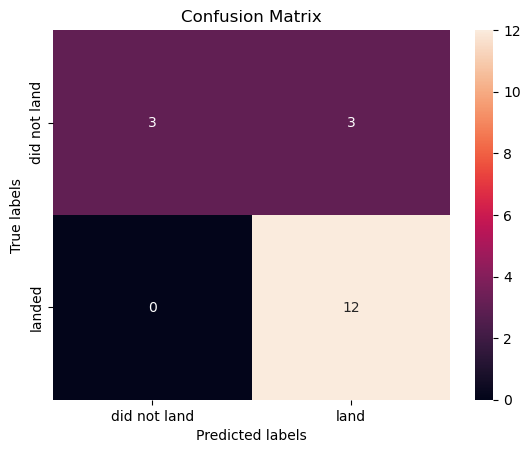

In [41]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Confusion Matrix:
[[ 3  3]
 [ 0 12]]


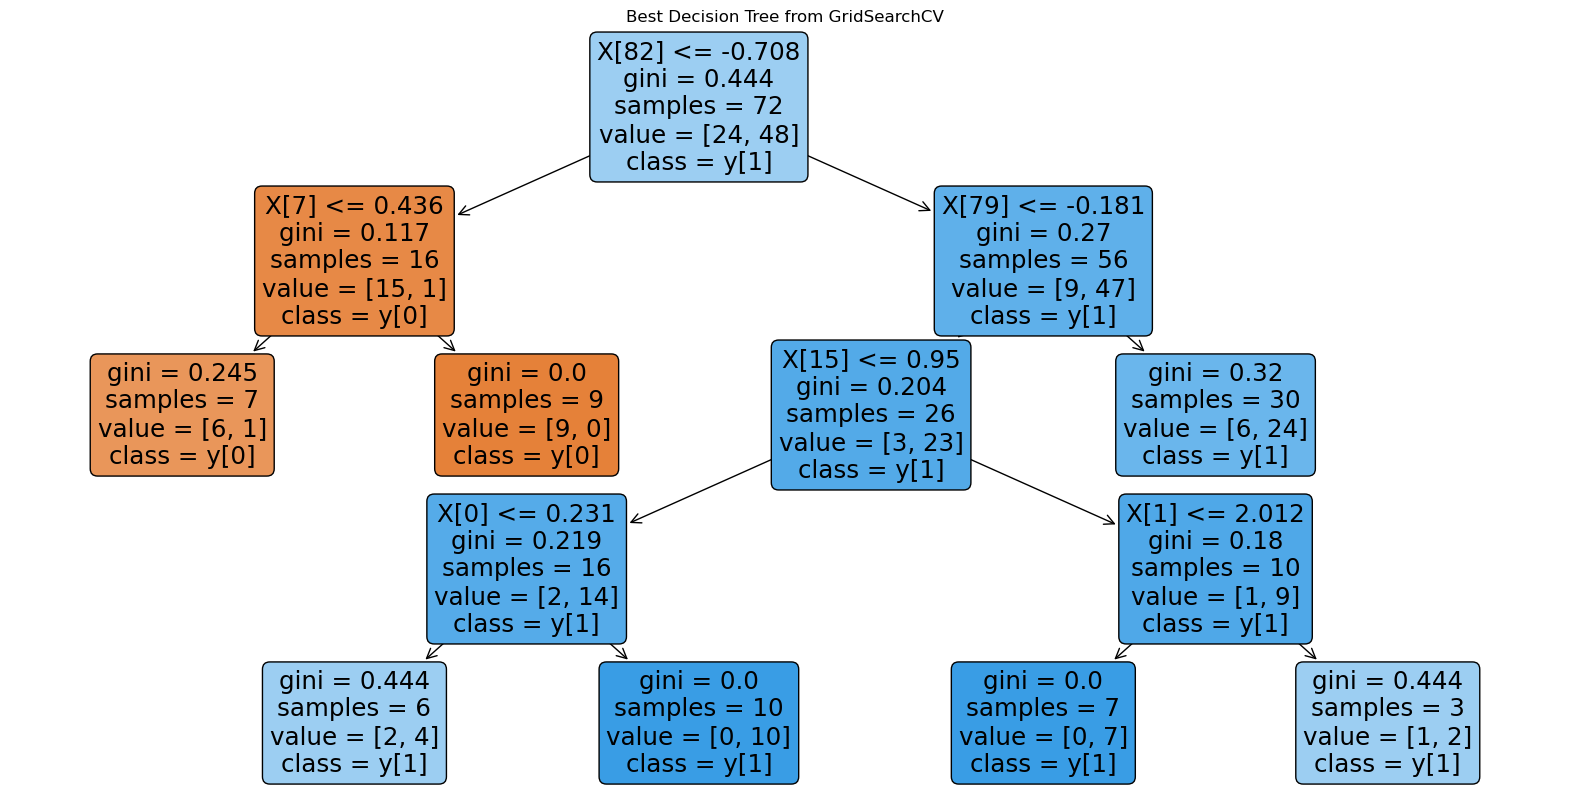

In [42]:
# Make predictions on test set
y_pred_tree = tree_cv.predict(X_test)

# Detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_tree))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_tree))

# Visualize the best tree (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_cv.best_estimator_, 
          feature_names=None,  # You can add feature names if available
          class_names=True, 
          filled=True, 
          rounded=True)
plt.title("Best Decision Tree from GridSearchCV")
plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [44]:
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [45]:
# Create the KNN object
knn = KNeighborsClassifier()

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(
    knn, 
    parameters_knn, 
    cv=10, 
    scoring='accuracy',
    n_jobs=-1  # Use all processors for faster computation
)

# Fit to training data
print("Fitting KNN with GridSearchCV...")
knn_cv.fit(X_train, Y_train)


Fitting KNN with GridSearchCV...


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [46]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [47]:
# Extended analysis for KNN
print("\n" + "="*60)
print("DETAILED KNN PERFORMANCE ANALYSIS")
print("="*60)

# Get the best estimator
best_knn = knn_cv.best_estimator_
print(f"Best number of neighbors: {best_knn.n_neighbors}")
print(f"Best distance metric: {'Manhattan (p=1)' if best_knn.p == 1 else 'Euclidean (p=2)'}")
print(f"Best algorithm: {best_knn.algorithm}")

# Calculate accuracy on test set
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"\n📊 PERFORMANCE METRICS:")
print(f"Cross-validation accuracy: {knn_cv.best_score_:.4f}")
print(f"Test set accuracy: {knn_test_accuracy:.4f}")
print(f"Difference: {abs(knn_cv.best_score_ - knn_test_accuracy):.4f}")

# Check for overfitting
difference = knn_cv.best_score_ - knn_test_accuracy
if difference > 0.05:
    print("⚠️  Potential overfitting (CV accuracy > test accuracy by > 0.05)")
elif difference < -0.05:
    print("⚠️  Potential underfitting (Test accuracy > CV accuracy by > 0.05)")
else:
    print("✅ Good generalization (CV and test accuracies are similar)")

# Make predictions on test set
y_pred_knn = knn_cv.predict(X_test)

# Calculate multiple metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, y_pred_knn)
precision = precision_score(Y_test, y_pred_knn)
recall = recall_score(Y_test, y_pred_knn)
f1 = f1_score(Y_test, y_pred_knn)

print(f"\n📈 DETAILED METRICS:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report
print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(Y_test, y_pred_knn, target_names=['Did Not Land', 'Landed']))

# Confusion matrix
print(f"🎯 CONFUSION MATRIX:")
conf_matrix = confusion_matrix(Y_test, y_pred_knn)
print(conf_matrix)

# Detailed confusion matrix analysis
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\n🔍 CONFUSION MATRIX BREAKDOWN:")
print(f"True Negatives (Correct 'Did Not Land'): {tn}")
print(f"False Positives (Wrong 'Landed'): {fp}")
print(f"False Negatives (Wrong 'Did Not Land'): {fn}")
print(f"True Positives (Correct 'Landed'): {tp}")


DETAILED KNN PERFORMANCE ANALYSIS
Best number of neighbors: 10
Best distance metric: Manhattan (p=1)
Best algorithm: auto

📊 PERFORMANCE METRICS:
Cross-validation accuracy: 0.8482
Test set accuracy: 0.8333
Difference: 0.0149
✅ Good generalization (CV and test accuracies are similar)

📈 DETAILED METRICS:
Accuracy:  0.8333
Precision: 0.8000
Recall:    1.0000
F1-Score:  0.8889

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Did Not Land       1.00      0.50      0.67         6
      Landed       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

🎯 CONFUSION MATRIX:
[[ 3  3]
 [ 0 12]]

🔍 CONFUSION MATRIX BREAKDOWN:
True Negatives (Correct 'Did Not Land'): 3
False Positives (Wrong 'Landed'): 3
False Negatives (Wrong 'Did Not Land'): 0
True Positives (Correct 'Landed'): 12


c:\Users\claud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\claud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

We can plot the confusion matrix


c:\Users\claud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


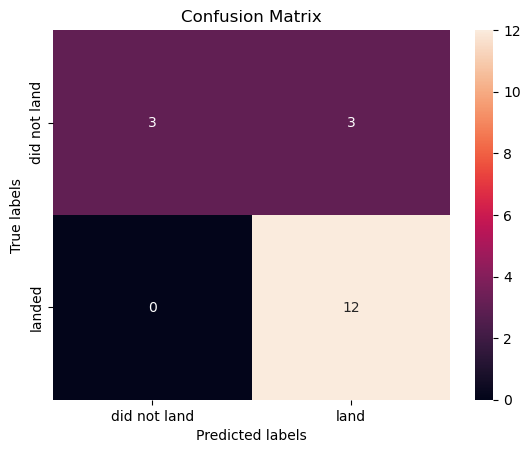

In [49]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

In [50]:
# Make predictions on test set
yhat_knn = knn_cv.predict(X_test)

# Detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(Y_test, yhat_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, yhat_knn))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Confusion Matrix:
[[ 3  3]
 [ 0 12]]


c:\Users\claud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## TASK  12


Find the method performs best:


In [51]:
# TASK 12
# Find the method performs best

print("=== TASK 12 - MODEL COMPARISON ===")

# make sure we have all models defined
print("Checking available models...")

# Create models dictionary (make sure all models exist)
models = {}

if 'logreg_cv' in locals() or 'logreg_cv' in globals():
    models['Logistic Regression'] = logreg_cv
    print("✅ Logistic Regression model found")
else:
    print("❌ Logistic Regression model not found - need to run Task 5")

if 'svm_cv' in locals() or 'svm_cv' in globals():
    models['SVM'] = svm_cv
    print("✅ SVM model found")
else:
    print("❌ SVM model not found - need to run Task 6")

if 'tree_cv' in locals() or 'tree_cv' in globals():
    models['Decision Tree'] = tree_cv
    print("✅ Decision Tree model found")
else:
    print("❌ Decision Tree model not found - need to run Task 8")

if 'knn_cv' in locals() or 'knn_cv' in globals():
    models['KNN'] = knn_cv
    print("✅ KNN model found")
else:
    print("❌ KNN model not found - need to run Task 10")

print(f"\nTotal models available for comparison: {len(models)}")

=== TASK 12 - MODEL COMPARISON ===
Checking available models...
✅ Logistic Regression model found
✅ SVM model found
✅ Decision Tree model found
✅ KNN model found

Total models available for comparison: 4


In [52]:
# Create a comprehensive comparison table
print("\n" + "="*80)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("="*80)

results = []

for model_name, model in models.items():
    try:
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        cv_accuracy = model.best_score_
        test_accuracy = accuracy_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred, zero_division=0)
        recall = recall_score(Y_test, y_pred, zero_division=0)
        f1 = f1_score(Y_test, y_pred, zero_division=0)
        
        # Get training time (if available)
        if hasattr(model, 'refit_time_'):
            fit_time = model.refit_time_
        else:
            fit_time = None
        
        results.append({
            'Model': model_name,
            'Best Parameters': str(model.best_params_),
            'CV Accuracy': cv_accuracy,
            'Test Accuracy': test_accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Fit Time': fit_time
        })
        
        print(f"✅ {model_name} metrics calculated")
        
    except Exception as e:
        print(f"❌ Error with {model_name}: {e}")
        continue

# Create results dataframe
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.round(4)
    
    # Display the comparison table
    print("\n" + "="*100)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*100)
    
    # Format the display
    display_columns = ['Model', 'CV Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']
    display_df = results_df[display_columns].copy()
    
    # Sort by Test Accuracy (descending)
    display_df = display_df.sort_values('Test Accuracy', ascending=False)
    
    print(display_df.to_string(index=False))
    
else:
    print("❌ No results to display - check model availability")


COMPREHENSIVE MODEL PERFORMANCE COMPARISON
✅ Logistic Regression metrics calculated
✅ SVM metrics calculated
✅ Decision Tree metrics calculated
✅ KNN metrics calculated

MODEL PERFORMANCE COMPARISON
               Model  CV Accuracy  Test Accuracy  Precision  Recall  F1-Score
 Logistic Regression       0.8464         0.8333        0.8     1.0    0.8889
                 SVM       0.8482         0.8333        0.8     1.0    0.8889
       Decision Tree       0.8768         0.8333        0.8     1.0    0.8889
                 KNN       0.8482         0.8333        0.8     1.0    0.8889


c:\Users\claud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
# Find the best performing model
if results:
    print("\n" + "="*80)
    print("BEST MODEL IDENTIFICATION")
    print("="*80)
    
    # Find best model based on test accuracy
    best_model_idx = results_df['Test Accuracy'].idxmax()
    best_model = results_df.loc[best_model_idx]
    
    print(f"🏆 BEST PERFORMING MODEL: {best_model['Model']}")
    print(f"   Test Accuracy: {best_model['Test Accuracy']:.4f}")
    print(f"   F1-Score: {best_model['F1-Score']:.4f}")
    print(f"   Precision: {best_model['Precision']:.4f}")
    print(f"   Recall: {best_model['Recall']:.4f}")
    
    # Also check by F1-Score (better for imbalanced datasets)
    best_f1_idx = results_df['F1-Score'].idxmax()
    best_f1_model = results_df.loc[best_f1_idx]
    
    if best_f1_idx != best_model_idx:
        print(f"🔍 Best by F1-Score: {best_f1_model['Model']} (F1: {best_f1_model['F1-Score']:.4f})")
    
    # Show best parameters
    print(f"\n🔧 Best Parameters for {best_model['Model']}:")
    print(f"   {best_model['Best Parameters']}")


BEST MODEL IDENTIFICATION
🏆 BEST PERFORMING MODEL: Logistic Regression
   Test Accuracy: 0.8333
   F1-Score: 0.8889
   Precision: 0.8000
   Recall: 1.0000

🔧 Best Parameters for Logistic Regression:
   {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}



📊 CREATING COMPARISON VISUALIZATIONS...


C:\Users\claud\AppData\Local\Temp\ipykernel_12488\2123360722.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(models_names, rotation=45, ha='right')


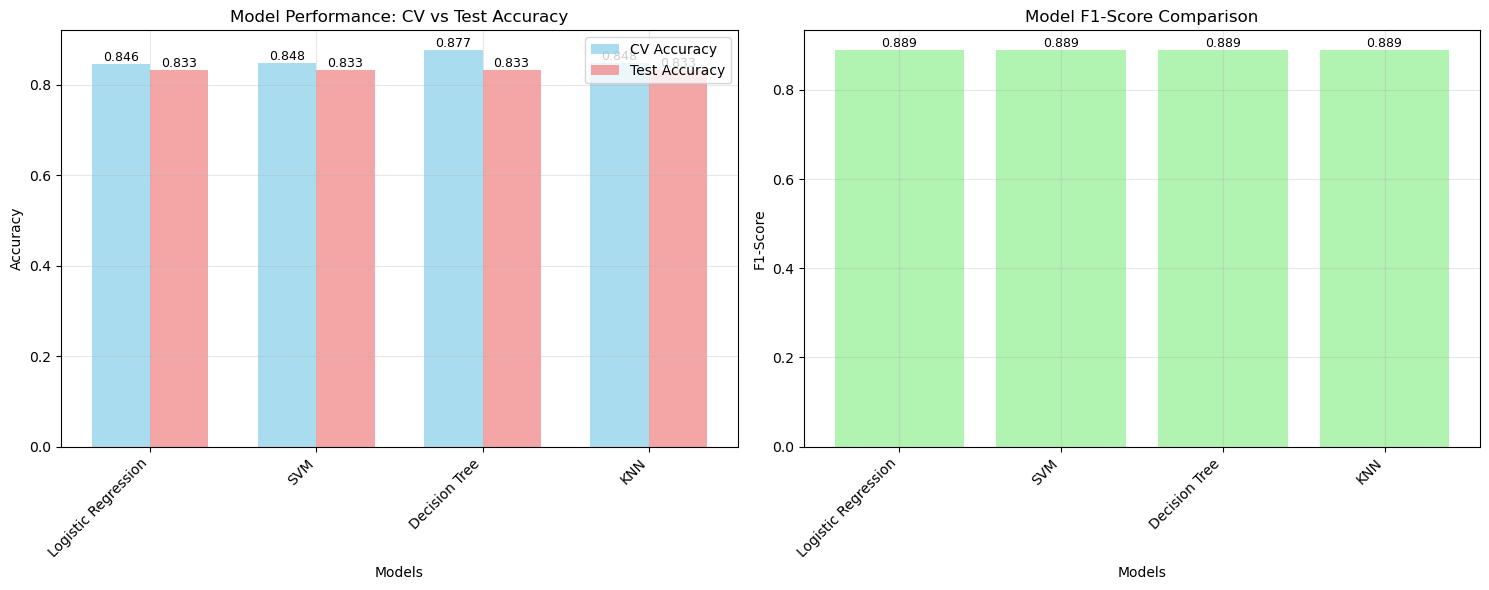

✅ Visualizations created successfully


In [54]:
# Visualization of model comparison
print("\n📊 CREATING COMPARISON VISUALIZATIONS...")

try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    if results:
        # Prepare data for plotting
        models_names = results_df['Model'].tolist()
        cv_scores = results_df['CV Accuracy'].tolist()
        test_scores = results_df['Test Accuracy'].tolist()
        f1_scores = results_df['F1-Score'].tolist()
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Accuracy comparison
        x = np.arange(len(models_names))
        width = 0.35
        
        bars1 = ax1.bar(x - width/2, cv_scores, width, label='CV Accuracy', 
                       alpha=0.7, color='skyblue')
        bars2 = ax1.bar(x + width/2, test_scores, width, label='Test Accuracy', 
                       alpha=0.7, color='lightcoral')
        
        ax1.set_xlabel('Models')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Model Performance: CV vs Test Accuracy')
        ax1.set_xticks(x)
        ax1.set_xticklabels(models_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        
        # Plot 2: F1-Score comparison
        bars3 = ax2.bar(models_names, f1_scores, alpha=0.7, color='lightgreen')
        ax2.set_xlabel('Models')
        ax2.set_ylabel('F1-Score')
        ax2.set_title('Model F1-Score Comparison')
        ax2.set_xticklabels(models_names, rotation=45, ha='right')
        ax2.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar in bars3:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualizations created successfully")
        
    else:
        print("❌ No data available for visualization")
        
except Exception as e:
    print(f"❌ Visualization error: {e}")

In [56]:
# Multi-metric analysis
print("\n" + "="*80)
print("MULTI-METRIC RANKING ANALYSIS")
print("="*80)

if results:
    # Create ranking based on different metrics
    metrics_to_rank = ['Test Accuracy', 'F1-Score', 'Precision', 'Recall']
    
    ranking_summary = []
    
    for metric in metrics_to_rank:
        # Sort by current metric
        ranked = results_df.nlargest(len(results_df), metric)[['Model', metric]]
        ranked.reset_index(drop=True, inplace=True)
        
        print(f"\n🏅 Ranking by {metric}:")
        for i, (idx, row) in enumerate(ranked.iterrows()):
            rank_symbol = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else f"{i+1}."
            print(f"   {rank_symbol} {row['Model']}: {row[metric]:.4f}")
        
        # Store ranking positions for summary
        for i, (idx, row) in enumerate(ranked.iterrows()):
            ranking_summary.append({
                'Model': row['Model'],
                'Metric': metric,
                'Rank': i + 1,
                'Value': row[metric]
            })
    
    # Overall performance summary
    print("\n" + "="*60)
    print("OVERALL PERFORMANCE SUMMARY")
    print("="*60)
    
    # Calculate average rank across all metrics
    summary_df = pd.DataFrame(ranking_summary)
    avg_rank = summary_df.groupby('Model')['Rank'].mean().sort_values()
    
    print("\n📊 Average Rank Across All Metrics (Lower is Better):")
    for model, rank in avg_rank.items():
        print(f"   {model}: {rank:.2f}")
    
    best_overall = avg_rank.index[0]
    print(f"\n🏆 OVERALL BEST MODEL: {best_overall} (Avg Rank: {avg_rank.iloc[0]:.2f})")
    
else:
    print("❌ No results available for ranking analysis")


MULTI-METRIC RANKING ANALYSIS

🏅 Ranking by Test Accuracy:
   🥇 Logistic Regression: 0.8333
   🥈 SVM: 0.8333
   🥉 Decision Tree: 0.8333
   4. KNN: 0.8333

🏅 Ranking by F1-Score:
   🥇 Logistic Regression: 0.8889
   🥈 SVM: 0.8889
   🥉 Decision Tree: 0.8889
   4. KNN: 0.8889

🏅 Ranking by Precision:
   🥇 Logistic Regression: 0.8000
   🥈 SVM: 0.8000
   🥉 Decision Tree: 0.8000
   4. KNN: 0.8000

🏅 Ranking by Recall:
   🥇 Logistic Regression: 1.0000
   🥈 SVM: 1.0000
   🥉 Decision Tree: 1.0000
   4. KNN: 1.0000

OVERALL PERFORMANCE SUMMARY

📊 Average Rank Across All Metrics (Lower is Better):
   Logistic Regression: 1.00
   SVM: 2.00
   Decision Tree: 3.00
   KNN: 4.00

🏆 OVERALL BEST MODEL: Logistic Regression (Avg Rank: 1.00)


In [58]:
# Final recommendations
print("\n" + "="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)

if results:
    best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
    best_f1_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
    
    print(f"🎯 For Maximum Accuracy: Use {best_model_name}")
    print(f"🎯 For Balanced Performance (F1-Score): Use {best_f1_model}")
    
    # Additional insights
    print(f"\n💡 INSIGHTS:")
    
    # Check if models have similar performance
    accuracy_range = results_df['Test Accuracy'].max() - results_df['Test Accuracy'].min()
    if accuracy_range < 0.05:
        print("   - All models have similar accuracy (difference < 0.05)")
        print("   - Consider model interpretability and training time")
    else:
        print(f"   - Significant performance differences exist (range: {accuracy_range:.3f})")
    
    # Check for overfitting
    overfitting_models = []
    for _, row in results_df.iterrows():
        if row['CV Accuracy'] - row['Test Accuracy'] > 0.05:
            overfitting_models.append(row['Model'])
    
    if overfitting_models:
        print(f"   - Potential overfitting in: {', '.join(overfitting_models)}")
    else:
        print("   - Good generalization across all models")
        
else:
    print("❌ No models available for recommendations")


FINAL RECOMMENDATIONS
🎯 For Maximum Accuracy: Use Logistic Regression
🎯 For Balanced Performance (F1-Score): Use Logistic Regression

💡 INSIGHTS:
   - All models have similar accuracy (difference < 0.05)
   - Consider model interpretability and training time
   - Good generalization across all models


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
